In [531]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [532]:
df = pd.read_csv("train_v9rqX0R.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [534]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Preprocessing

## Handling Null Values

In [535]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [536]:
df.drop(columns="Item_Identifier",inplace=True)

In [537]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)

In [538]:
df.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Handling outlier

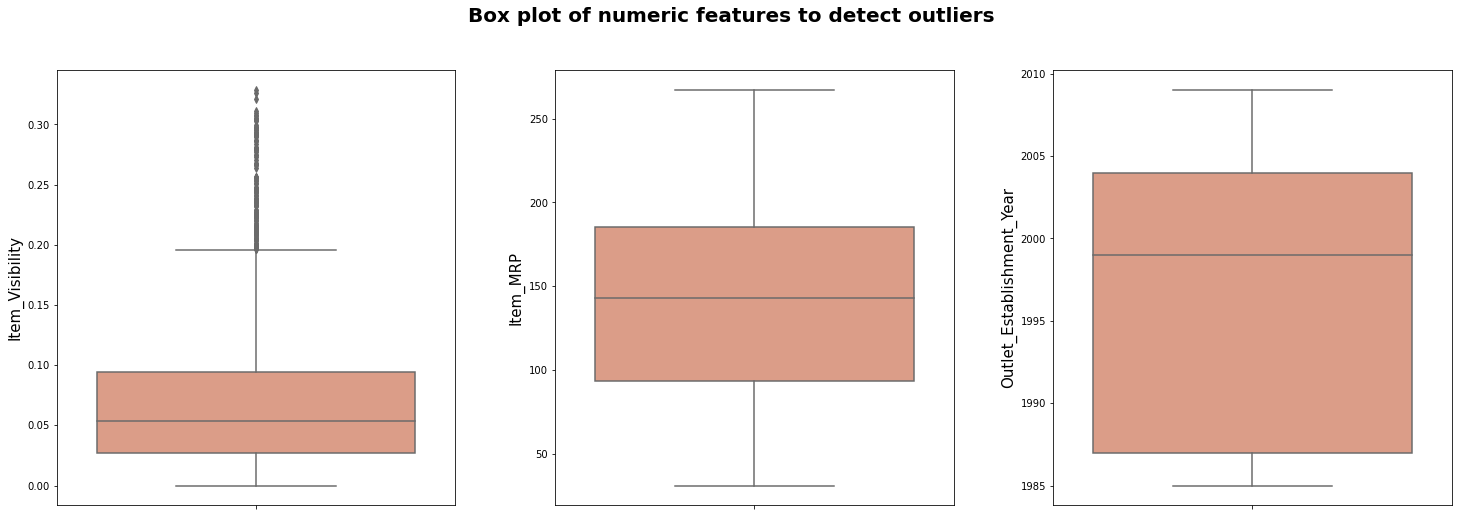

In [539]:
col_num=df.select_dtypes(include=["int64","float64"]).columns.tolist()
fig,axs=plt.subplots(1,3,figsize=(25,8))
fig.suptitle("Box plot of numeric features to detect outliers",y=0.99,fontweight="bold",fontsize=20)
for col,ax in zip(col_num[1:],axs.flatten()):
    b=sns.boxplot(y=df[col],ax=ax,color="darksalmon")
    b.set_ylabel(col,fontsize=15)
    plt.subplots_adjust(wspace=.25)


In [540]:
Q1=np.percentile(df['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(df['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(df['Item_Visibility'],75,interpolation='midpoint')

IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [541]:
print('The values of annual income below',low_lim,'and the values  of annual income above',up_lim,'are outliers.')

The values of annual income below -0.07440424500000001 and the values  of annual income above 0.195979015 are outliers.


In [542]:
outlier=[]
for x in df['Item_Visibility']:
    if x > up_lim or x < low_lim:
        outlier.append(x)
        
print('There are',len(outlier),'outliers in annual income column.','\n')
print('Outliers are:',outlier)

There are 144 outliers in annual income column. 

Outliers are: [0.255394896, 0.293417759, 0.278974075, 0.291865402, 0.2047, 0.264124669, 0.228993134, 0.297883712, 0.233039817, 0.210375806, 0.220225608, 0.328390948, 0.205294827, 0.247321039, 0.214139786, 0.227189581, 0.223440258, 0.267352587, 0.25637539, 0.244102315, 0.255348289, 0.224837308, 0.22417463, 0.245542627, 0.236433601, 0.270300331, 0.204713036, 0.32111501, 0.248301532, 0.274405193, 0.207783483, 0.196438668, 0.235354055, 0.241055611, 0.196490902, 0.30374337, 0.23212188, 0.216323008, 0.198424841, 0.213125482, 0.237651344, 0.222063351, 0.294939214, 0.284065879, 0.234733477, 0.309390255, 0.277459381, 0.21332355, 0.253947823, 0.203510667, 0.236616754, 0.205605116, 0.212963193, 0.228469522, 0.232072674, 0.304859104, 0.291826616, 0.242768664, 0.298205272, 0.325780807, 0.266234421, 0.208987123, 0.255929096, 0.24749009, 0.27321283, 0.208162156, 0.2004264, 0.225476528, 0.209600084, 0.308145448, 0.245483691, 0.267565911, 0.21799414, 0.

In [543]:
ind1=df['Item_Visibility'] > up_lim
i1=df.loc[ind1].index

print('The index values of the outliers which are above upper limit:',i1,'\n')


The index values of the outliers which are above upper limit: Int64Index([  49,   83,  108,  174,  334,  434,  502,  521,  532,  680,
            ...
            7866, 7949, 8194, 8215, 8273, 8292, 8345, 8371, 8432, 8509],
           dtype='int64', length=144) 



In [544]:
df.drop(i1,inplace=True)

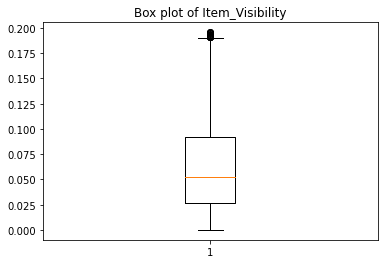

In [545]:
plt.boxplot(df['Item_Visibility'])
plt.title('Box plot of Item_Visibility')
plt.show()

In [546]:
df['Item_Fat_Content'].nunique()

5

In [547]:
df['Item_Fat_Content'].value_counts()

Low Fat    5016
Regular    2831
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

In [548]:
dict1 = {"Low Fat":"Low Fat", "Regular":"Regular", "LF": "Low Fat" , "reg": "Regular", "low fat": "Low Fat"}

In [549]:
df["Item_Fat_Content"] = df['Item_Fat_Content'].map(dict1)

In [550]:
df['Item_Fat_Content'].value_counts()# one-hot

Low Fat    5432
Regular    2947
Name: Item_Fat_Content, dtype: int64

In [551]:
df['Item_Type'].value_counts()#one-hot

Fruits and Vegetables    1208
Snack Foods              1181
Household                 897
Frozen Foods              845
Dairy                     670
Canned                    638
Baking Goods              631
Health and Hygiene        516
Soft Drinks               439
Meat                      418
Breads                    248
Hard Drinks               211
Others                    167
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64

In [552]:
 df['Outlet_Size'].value_counts()#labelencode

Medium    5136
Small     2311
High       932
Name: Outlet_Size, dtype: int64

In [553]:
 df['Outlet_Location_Type'].value_counts()#labelencode

Tier 3    3283
Tier 2    2785
Tier 1    2311
Name: Outlet_Location_Type, dtype: int64

In [554]:
 df['Outlet_Type'].value_counts()#one-hot

Supermarket Type1    5577
Grocery Store         939
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Label encoding

In [555]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Outlet_Size']=lb.fit_transform(df['Outlet_Size'])

In [556]:
x = df.drop("Item_Outlet_Sales",axis = 1)
y = pd.DataFrame(df["Item_Outlet_Sales"])

In [557]:
x=pd.get_dummies(x)

In [558]:
y.shape

(8379, 1)

In [559]:
x.shape

(8379, 40)

## Modelling

In [560]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [561]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(5865, 40) (5865, 1)
(2514, 40) (2514, 1)


In [562]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [563]:
print(regression.coef_)

[[    2.88909923  -213.53428625    15.96142577   -10.19831384
    -41.7043145    -11.29625678    11.29625678   -42.11584362
    -77.86825897    -8.19988409    17.45922175   -25.22405373
     -6.48256225     2.96295018  -121.75378347     8.42408508
    -33.82552116   -16.87862889    -8.79865716   293.29447321
     10.92305615    27.19513972   -19.11173276  -605.95813267
   -173.18534561   115.5867922     40.31923899  -500.48441968
    780.10062397   134.48108509  -159.27284591   151.11367448
    217.29932914  -132.07141606    90.79503138    41.27638468
  -1106.44255235   286.02268939    40.31923899   780.10062397]]


In [564]:
print(regression.intercept_)

[20155.01562839]


In [565]:
reg_pred=regression.predict(x_test)

In [566]:
reg_pred

array([[-585.84922044],
       [2810.34335895],
       [1423.97695308],
       ...,
       [1990.47094319],
       [3173.57585294],
       [4317.94154115]])

Text(0, 0.5, 'Test Predicted Data')

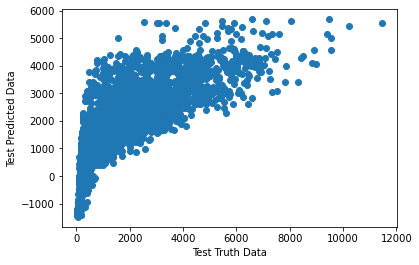

In [567]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [568]:
residuals=y_test-reg_pred

In [569]:
residuals

,Item_Outlet_Sales
2912,985.329220
8309,-693.099359
7495,436.268247
4934,-177.866908
5759,-1417.403574
...,...
256,-703.884295
3404,1701.129652
5648,-716.129743
1817,1236.683347


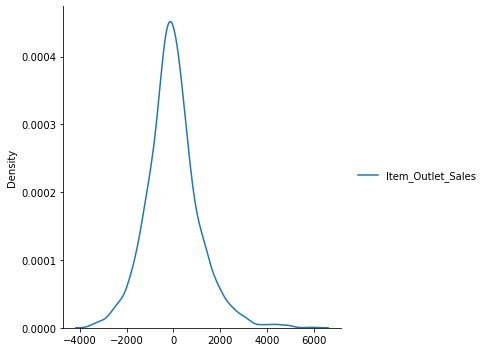

In [570]:
sns.displot(residuals,kind="kde")

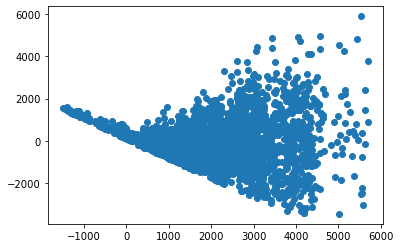

In [571]:
plt.scatter(reg_pred,residuals)

In [572]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1253352.2664458521
827.526060275397
1119.5321640961693


In [573]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5477126418342546


In [574]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5403970355557954

In [575]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [576]:
ridge.fit(x_train,y_train)

Ridge()

In [577]:
ridge.predict(x_test)

array([[-585.37824292],
       [2809.84642308],
       [1423.29131269],
       ...,
       [1989.64652435],
       [3173.64586736],
       [4318.86123141]])

In [578]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [579]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1617.8261521010916
RMSE value for k=  2 is: 1408.424015670354
RMSE value for k=  3 is: 1312.993396105078
RMSE value for k=  4 is: 1265.7307545580502
RMSE value for k=  5 is: 1233.5646226156928
RMSE value for k=  6 is: 1239.6344508090763
RMSE value for k=  7 is: 1238.1989309955543
RMSE value for k=  8 is: 1229.3538914334094
RMSE value for k=  9 is: 1228.5236529322644
RMSE value for k=  10 is: 1230.8640761912716
RMSE value for k=  11 is: 1232.7254065989869
RMSE value for k=  12 is: 1237.5441273594074
RMSE value for k=  13 is: 1246.26530008232
RMSE value for k=  14 is: 1251.7985252565095
RMSE value for k=  15 is: 1256.6567122553954
RMSE value for k=  16 is: 1262.419061403227
RMSE value for k=  17 is: 1266.7966888596334
RMSE value for k=  18 is: 1273.1764111236394
RMSE value for k=  19 is: 1275.4289499170395
RMSE value for k=  20 is: 1283.1810601161405


<AxesSubplot:>

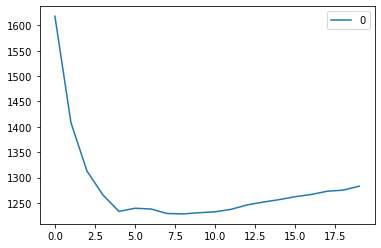

In [580]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [581]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [582]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

In [583]:
print(x.shape)
print(y.shape)
print(df1.shape)

(8379, 40)
(8379, 1)
(5681, 40)


In [584]:
from sklearn import metrics

for name in algos:
    model = name
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    MSE= metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
   

In [585]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [586]:
evaluation 

,Model,RMSE
0,Linear Regression,1119.532164
1,Ridge Regression,1119.495065
2,Lasso Regression,1118.704269
3,K Neighbors Regressor,1233.564623
4,Decision Tree Regressor,1498.121727


## Hyper Parameter Tuning

In [587]:
from sklearn.model_selection import GridSearchCV
LassoRegression = Lasso()
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
LassoRegressor.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [588]:
print("Best value for lambda : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for lambda :  {'alpha': 5}
Best score for cost function:  -1287145.0807405363


In [589]:
LassoRegression=Lasso(alpha=5)
LassoRegression.fit(x_train,y_train)
y_pred=lasso.predict(x_test)

error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
error

1118.704269010216

In [590]:
y_pred.shape

(2514,)

In [591]:
y_test.shape

(2514, 1)

## Model testing

In [592]:
test_file = pd.read_csv("test_AbJTz2l.csv")

In [593]:
df1 = pd.read_csv("test_AbJTz2l.csv")
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [594]:
df1.drop(columns="Item_Identifier",inplace=True)

In [595]:
df1.isna().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [596]:
df1["Item_Weight"].fillna(df1["Item_Weight"].mean(),inplace=True)
df1["Outlet_Size"].fillna(df1["Outlet_Size"].mode()[0],inplace=True)

In [597]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df1['Outlet_Size']=lb.fit_transform(df1['Outlet_Size'])

In [598]:
df1['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [599]:
dict2 = {"Low Fat":"Low Fat", "Regular":"Regular", "LF": "Low Fat" , "reg": "Regular", "low fat": "Low Fat"}

In [600]:
df1["Item_Fat_Content"] = df1['Item_Fat_Content'].map(dict2)

In [601]:
df1['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [602]:
df1=pd.get_dummies(df1)

In [603]:
df1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,1,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,2,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5677,7.600000,0.142991,169.1448,2009,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5678,10.000000,0.073529,118.7440,2002,1,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
5679,15.300000,0.000000,214.6218,2007,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [604]:
df1.shape

(5681, 40)

In [605]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')
LassoRegression = Lasso(alpha=5)
LassoRegression.fit(x, y)
final_predictions = LassoRegression.predict(df1)
submission['Item_Outlet_Sales'] = final_predictions
#only positive predictions for the target variable
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission1.csv', index=False)